###  Histórico de compras de comércio eletrônico de loja de eletrônicos
Este arquivo contém dados de compras de abril de 2020 a novembro de 2020 em uma grande loja online de eletrodomésticos e eletrônicos.

Cada linha no arquivo representa um evento. Todos os eventos são relacionados a produtos e usuários. Cada evento é como uma relação muitos-para-muitos entre produtos e usuários.

Dados coletados pelo projeto Open CDP . Sinta-se à vontade para usar a plataforma de dados de clientes de código abe
- https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-electronics-store/datarto.

In [7]:
import pandas as pd
base = pd.read_csv("Kz.csv")

In [8]:
base.head(3)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18


In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [10]:
# 2.6 milhões de linhas
base.shape

(2633521, 8)

In [11]:
base.nunique()

event_time       1316174
order_id         1435266
product_id         25113
category_id          900
category_code        510
brand              23021
price               2802
user_id            98262
dtype: int64

In [12]:
base.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [13]:
nulos_price = base[base["price"].isnull()]
nulos_price

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
1812,2020-05-02 11:12:20 UTC,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN
3633,2020-05-06 07:37:55 UTC,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN
3918,2020-05-06 22:36:13 UTC,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN
6015,2020-05-10 09:41:54 UTC,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN
7802,2020-05-13 03:09:39 UTC,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN
...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56 UTC,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN
2632434,2020-11-19 05:38:31 UTC,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN
2632437,2020-11-19 11:21:22 UTC,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN
2632472,2020-11-19 09:54:22 UTC,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN


### Analisando items com dados e sem dados

In [14]:
# quantidade de produtos que estão faltando dados
sem_dados = nulos_price["product_id"].nunique()
sem_dados

1304

In [15]:
# Total de produtos
com_dados = base["product_id"].nunique()
com_dados

25113

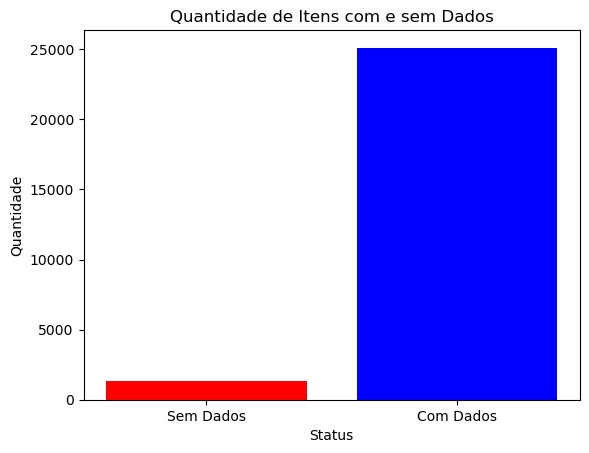

In [16]:
import matplotlib.pyplot as plt

# Quantidade de itens com e sem dados
quantidades = [sem_dados, com_dados]
labels = ['Sem Dados', 'Com Dados']

# Criação do gráfico de barras
plt.bar(labels, quantidades, color=['red', 'blue'])

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Itens com e sem Dados')
plt.xlabel('Status')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()


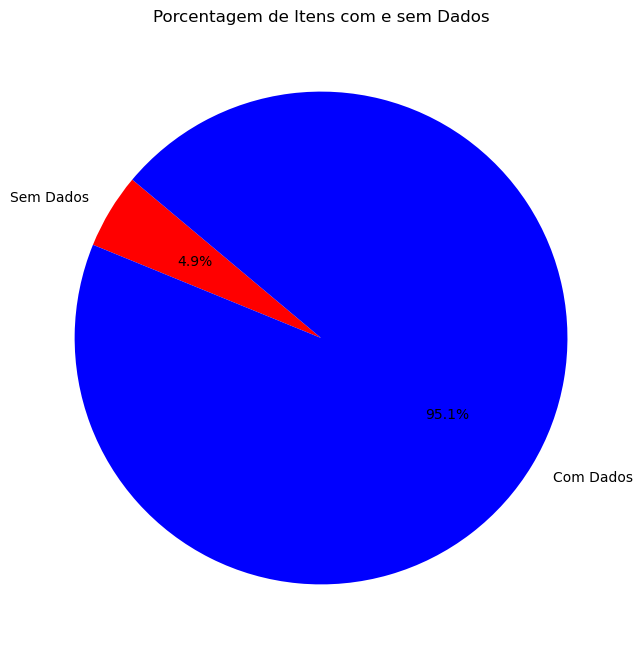

In [17]:
import matplotlib.pyplot as plt

# Calculando o total de itens
total_itens = sem_dados + com_dados

# Calculando as porcentagens
percentual_sem_dados = (sem_dados / total_itens) * 100
percentual_com_dados = (com_dados / total_itens) * 100

# Dados para o gráfico de pizza
labels = ['Sem Dados', 'Com Dados']
percentuais = [percentual_sem_dados, percentual_com_dados]
colors = ['red', 'blue']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(percentuais, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adicionando título
plt.title('Porcentagem de Itens com e sem Dados')

# Exibindo o gráfico
plt.show()


### Vamos calcular a média dos valores por categoria e marca

In [18]:
base.head(2)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18


In [19]:
# Deletando os valores nulos
base = base.dropna()

In [20]:
# pegando a media da categoria de items mais cara, não peguei os produtos pois eles vem como id neste database
top_produtos = base.groupby(["category_code"])["price"].mean().sort_values(ascending=False).reset_index().head()
top_produtos

,category_code,price
0,electronics.camera.video,670.243985
1,computers.notebook,571.644938
2,construction.tools.heater,513.446121
3,electronics.video.tv,495.243089
4,appliances.kitchen.dishwasher,491.108414


In [21]:
# Deixando o nome mais bonito
for i in range(len(top_produtos)):
    product_name = top_produtos["category_code"][i].replace('.', ' ')
    print(product_name)
    top_produtos.loc[i, "category_code"] = product_name

electronics camera video
computers notebook
construction tools heater
electronics video tv
appliances kitchen dishwasher


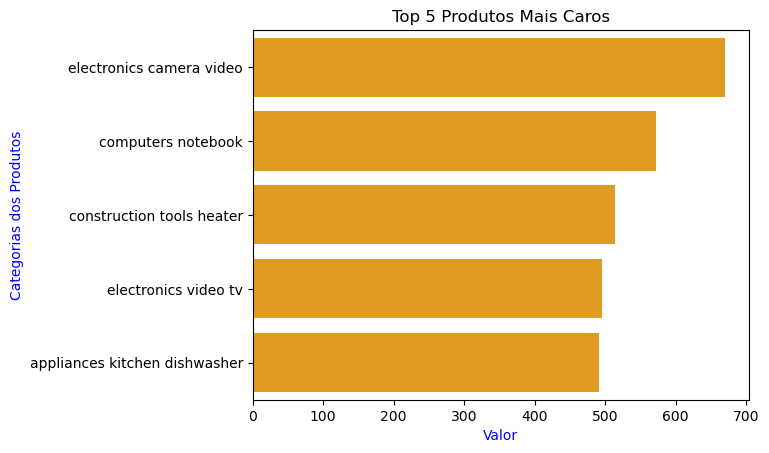

In [22]:
import seaborn as sns
# Criando o gráfico de barras horizontais
sns.barplot(x='price', y='category_code', data=top_produtos, color="orange")
plt.ylabel('Categorias dos Produtos', c="blue")
plt.xlabel('Valor', c="blue")
plt.title('Top 5 Produtos Mais Caros')
plt.show()

In [23]:
# pegando a media das marcas mais caras
top_marcas = base.groupby(["brand"])["price"].mean().sort_values(ascending=False).head(5)
top_marcas

brand
yamaguchi    6215.250000
technogym    3674.898333
gewa         3261.780000
loewe        2321.502500
nvidia       2218.650000
Name: price, dtype: float64

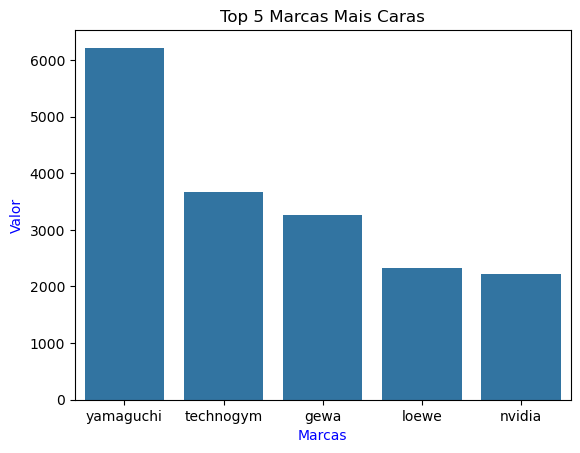

In [24]:
import seaborn as sns
sns.barplot(top_marcas)
plt.title('Top 5 Marcas Mais Caras')
plt.xlabel('Marcas', c="blue")
plt.ylabel('Valor', c="blue")
plt.show()

#### Exportando base tratada para o power bi

In [25]:
# base.to_csv('base_tratada.csv', index=False)